In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_dataset = pd.read_csv('https://raw.githubusercontent.com/msht/ML_Course/main/result.csv', sep = ',', header=None)

In [3]:
raw_dataset.columns = ['Percentage', 'strain_XX', 'strain_XY','strain_YZ','stress_XX', 'stress_XY','stress_YZ']

In [4]:
raw_dataset['Percentage'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [5]:
palette = np.array(sns.color_palette("bright", 15))  #Chossing color 

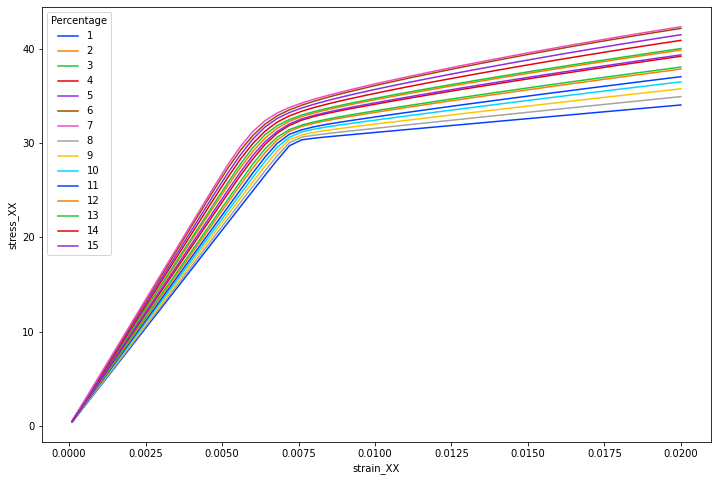

In [6]:
plt.figure(figsize = (12,8))
palette = sns.color_palette("bright", 15)  #Chossing color 
sns.lineplot( x = 'strain_XX', y = 'stress_XX', data = raw_dataset, palette=palette, hue = 'Percentage', legend = 'full')
plt.show()

**Split Data into X & Y**

In [7]:
X = raw_dataset.iloc[:,0:4]
Y = raw_dataset.iloc[:,4:7]

In [8]:
X

,Percentage,strain_XX,strain_XY,strain_YZ
0,1,0.0001,-0.000034,-1.499200e-08
1,1,0.0002,-0.000068,-3.182700e-08
2,1,0.0012,-0.000412,-1.923900e-07
3,1,0.0016,-0.000549,-2.567300e-07
4,1,0.0020,-0.000687,-3.219800e-07
...,...,...,...,...
745,15,0.0184,-0.010528,3.256300e-04
746,15,0.0188,-0.010827,3.360400e-04
747,15,0.0192,-0.011128,3.464400e-04
748,15,0.0196,-0.011430,3.568800e-04


In [9]:
Y

,stress_XX,stress_XY,stress_YZ
0,0.41647,0.002704,0.000003
1,0.83108,0.002189,-0.000001
2,4.98100,0.004208,0.000003
3,6.64090,0.003861,0.000011
4,8.30060,0.003834,0.000011
...,...,...,...
745,38.58800,0.006364,0.000409
746,38.77500,0.006454,0.000419
747,38.96000,0.006539,0.000428
748,39.14400,0.006621,0.000433


**Pre-Processing of Dataset**

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [11]:
# Applying Transformation
scaler_X = scaler.fit(X)
scaled_X = scaler_X.transform(X)

In [12]:
# Applying Transformation
scaler_Y = scaler.fit(Y)
scaled_Y = scaler_Y.transform(Y)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, scaled_Y, test_size = 0.01, random_state = 3)

In [14]:
len(X_train)

742

**ANN Regression**

In [15]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

In [16]:
model=Sequential([
    Dense(64, input_dim=4,activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3)
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total params: 25,539
Trainable params: 25,539
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(Adam(learning_rate=0.00001), loss='mean_squared_error', metrics=['accuracy'])

In [19]:
# Epochs = Number of Iterations, Batch Size = number of samples per execution
# validation_split = 10% of overall training samples to validate algorithm parallely to avoid overfitting of algorithm
history = model.fit(X_train, Y_train, validation_split=0.01, epochs=1000, shuffle=True, verbose=2)

Epoch 1/1000
23/23 - 14s - loss: 0.4637 - accuracy: 0.1676 - val_loss: 0.4230 - val_accuracy: 0.0000e+00
Epoch 2/1000
23/23 - 0s - loss: 0.4520 - accuracy: 0.1703 - val_loss: 0.4105 - val_accuracy: 0.0000e+00
Epoch 3/1000
23/23 - 0s - loss: 0.4408 - accuracy: 0.1826 - val_loss: 0.3985 - val_accuracy: 0.0000e+00
Epoch 4/1000
23/23 - 0s - loss: 0.4299 - accuracy: 0.1894 - val_loss: 0.3870 - val_accuracy: 0.1250
Epoch 5/1000
23/23 - 0s - loss: 0.4193 - accuracy: 0.1948 - val_loss: 0.3758 - val_accuracy: 0.2500
Epoch 6/1000
23/23 - 0s - loss: 0.4091 - accuracy: 0.1962 - val_loss: 0.3648 - val_accuracy: 0.2500
Epoch 7/1000
23/23 - 0s - loss: 0.3992 - accuracy: 0.2030 - val_loss: 0.3540 - val_accuracy: 0.2500
Epoch 8/1000
23/23 - 0s - loss: 0.3896 - accuracy: 0.2153 - val_loss: 0.3433 - val_accuracy: 0.2500
Epoch 9/1000
23/23 - 0s - loss: 0.3801 - accuracy: 0.2248 - val_loss: 0.3331 - val_accuracy: 0.2500
Epoch 10/1000
23/23 - 0s - loss: 0.3708 - accuracy: 0.2398 - val_loss: 0.3229 - val_acc

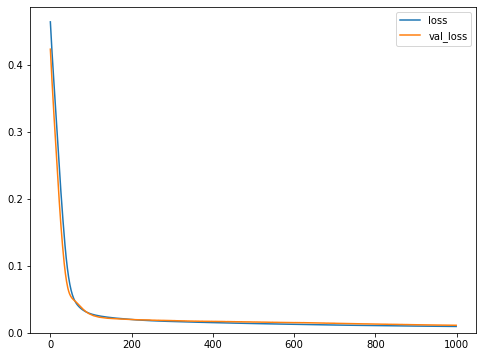

In [20]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize = (8,6))
plt.ylim(bottom=0)
plt.show()

In [21]:
predictions=model.predict(X_test)

In [22]:
from sklearn.metrics import r2_score
r2_score(Y_test, predictions)

0.7474776011737049

In [23]:
sigma=scaler_Y.inverse_transform(predictions)
print(sigma)

[[ 1.2817410e+01  3.3906524e-03  1.2477250e-05]
 [ 3.4200413e+01  6.5092943e-03  1.6176835e-05]
 [ 1.4959040e+01  2.9826080e-03 -2.2536567e-05]
 [ 1.1269504e+00  2.8977594e-03  4.6733840e-05]
 [ 3.4835518e+01  5.3983401e-03  1.2764183e-04]
 [ 4.0146122e+01  6.5421555e-03 -1.4849125e-04]
 [ 3.5475807e+01  5.5786180e-03  1.8095227e-04]
 [ 2.3114700e+01  3.7824537e-03 -2.6555166e-05]]


In [24]:
np.savetxt('sigma.csv',sigma, delimiter=',')

In [25]:
model.save('NNforclass.h5')

In [26]:
model.save_weights('NNforclass.h5')

In [27]:
model.get_weights()

[array([[-1.97316870e-01, -3.47206835e-03, -2.82644182e-01,
         -1.76850647e-01, -2.09983185e-01, -3.59212130e-01,
         -2.30165154e-01, -3.74191161e-03, -2.46156290e-01,
         -3.32588941e-01,  7.69229084e-02, -2.89693683e-01,
         -1.73355088e-01, -2.02716321e-01,  1.71565518e-01,
         -2.60891289e-01, -1.12354919e-01,  2.57222593e-01,
          5.65220602e-02,  1.74411789e-01,  2.98972309e-01,
         -1.51133552e-01, -8.56825113e-02,  2.69707203e-01,
          2.19533294e-01,  1.47554934e-01,  1.15242273e-01,
         -2.85866056e-02,  2.97309399e-01,  6.10597767e-02,
          2.70456702e-01, -3.40766132e-01,  3.26098851e-03,
         -3.29998225e-01,  9.92493331e-02, -2.65349776e-01,
         -2.28568852e-01,  1.75835118e-01,  2.05043361e-01,
         -2.09215522e-01,  1.92533135e-01, -2.76370943e-01,
          3.42616558e-01, -8.06724466e-03,  7.80505165e-02,
         -2.86190975e-02,  2.51881868e-01,  1.45459518e-01,
          6.17525615e-02, -2.46726617e-0

**Let's try to predict a stress-strain curve**

In [28]:
predict_dataset = raw_dataset[raw_dataset['Percentage']==4]

In [29]:
X_predict = (predict_dataset.iloc[:,0:4])
Y_predict = (predict_dataset.iloc[:,4:7])

In [30]:
predScaler_X = scaler.fit(X_predict)
scaled_X_predict = predScaler_X.transform(X_predict)

In [31]:
new_predictions=model.predict(scaled_X_predict)

In [32]:
predScaler_Y = scaler.fit(Y)
predSigma = predScaler_Y.inverse_transform(new_predictions)

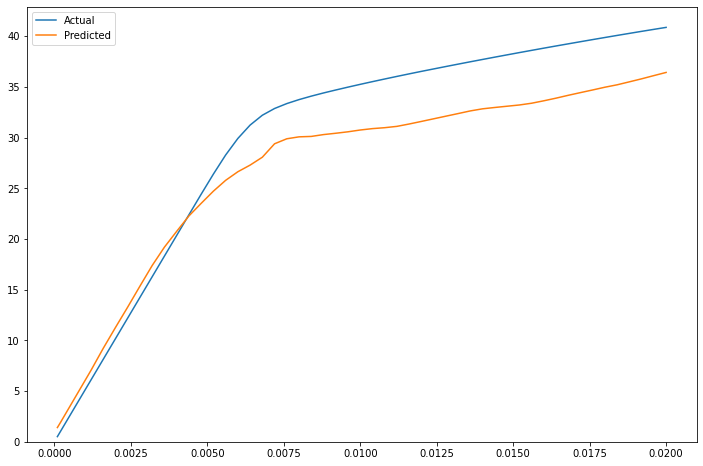

In [33]:
plt.figure(figsize = (12,8))
plt.plot(X_predict.iloc[:,1],Y_predict.iloc[:,0])
plt.plot(X_predict.iloc[:,1],predSigma[:,0])
plt.legend(['Actual','Predicted'])
plt.ylim(bottom=0)
plt.show()